Facts:  


When was the Sinking of the Estonia: September 28, 1994
Where was the Sinking of the Estonia: Near the Turku Archipelago, in the Baltic Sea
What was the Sinking of the Estonia death toll: 852 passengers and crew

Interesting things to investigate about the data:

Who's more likely to survive the sinking based on data?
Is age an indicator for survival?
Is gender an indicator for survival?
Did the crew aboard have a higher chance of survival than passengers?


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os

In [ ]:
data =pd.read_csv('../input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv')

In [ ]:
data.head()

## How many Survived?

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### Observation

Only 13.9% passengers on ship survived. 


## Passengers onboard




### Gender 

In [ ]:
data['Sex'].value_counts()


In [ ]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (14,14))

size = data.Sex.value_counts().values

colors = ['orange', 'yellow']
labels = data.Sex.value_counts().index
explode = [0, 0]

circle = plt.Circle((0, 0), 0.3, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

size = data.Category.value_counts().values

colors = [ 'crimson', 'lightgreen']
labels = data.Category.value_counts().index
explode = [0, 0]

circle = plt.Circle((0, 0), 0.3, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Passenger vs Crew', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()


### Nationalities onboard

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show death counts by country
print(data.Country.value_counts())

ax = sns.barplot(
    x = data['Country'].value_counts().keys(), 
    y = data['Country'].value_counts().values
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

### Popular Surname lost lives

In [ ]:

plt.figure(figsize=(20,10))

values = data['Lastname'].value_counts().tolist()[:10]
names = list(dict(data['Lastname'].value_counts()).keys())[:10]

sns.barplot(
    x=names,
    y=values)

plt.show()

### Observation

As per the donut chart it can be concluded that there where equal number of male and female passengers on the unfortunate ship. We can also conclude that the ratio of passangers are more compare to the ratio of crew members. The gender data is somewhat balanced but the category data is imbalanced

## Age Distribution 

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data['Age'],color= 'orange')
plt.title('Passenger age distribution',size=20)
plt.axvline(data['Age'].median(),color='blue',label='Median age')
plt.legend()

### Observation 1
In the above normalization curve the median age of both the gender is around 45 years. Let us observe the age distribution of each gender and know their median age.

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Age distribution of men and women.')
g = sns.kdeplot(data['Age'].loc[data['Sex'] == 'M'], 
                shade= True, label='Male').set_xlabel('Age')
g = sns.kdeplot(data['Age'].loc[data['Sex'] == 'F'], 
                shade=True, label='Female')

plt.axvline(data['Age'].loc[data['Sex']== 'M'].median(),color='green',label='Median age- Male')
plt.axvline(data['Age'].loc[data['Sex']== 'F'].median(),color='red',label='Median age- Female')

plt.grid()

### Observation 2

The age distribution are quite similar to each other. The curves are masking each other except the top right distibution. It can be concluded that the median age of female was more then male.


## Age vs Category

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x ='Age', y = 'Category', data = data)
plt.show()

### Observation

There were more passengers and less crew which is logical. The crew's median age is between the range of 30 to 45 and the passanges' age is between 30-65. 
Hence, falling under the age median age group of 40-60 as observed in age distribution normalization curve. 

As we have already divided the ages into groups lets' check the percentage of Adults, Youth, Senior, Child were travelling.

## Age Group 

In [ ]:
plt.figure(figsize=(18,15))


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Adult', 'Senior', 'Child', 'Youth','NA'
sizes = [668, 164, 14, 142,1]
explode = (0, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Observation 1: 
Most of them were adults.It is also show 1.3% were children.
Lets check if there was an infant on the ship.


In [ ]:
data[data.Age<1]

In [ ]:
data[data.Lastname=='ZELMIN']


### Observation2
There was a family in the ship with the child and infant. Unfortunately no one survived. 
To Do: You may set an age less than 12 and see which passenger was with the child. There could be one or more famiies onboard. 

## Country VS Age

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x ='Country', y = 'Age', data = data)
plt.show()

### Observation

There were few Senior Adults from Estonia, Finland, Denmark. 
Sweden, Estinia,Gemary, Great Brtain had the most number of Senior adults.
As there was one Canadian on board, it can be concluded that he was a senior adult.  

## Age vs Survived

In [ ]:
grp =data.groupby("Age")

plt.figure(figsize=(16,5))
plt.plot(grp["Survived"].agg(np.mean),'r--',color='g')
plt.xticks(rotation=90)
plt.title("Age V/s Survived")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

### Observation

Unfortunately the Children below the age of 5 and Senior Adults above the age of 65 could not survive. 
Most of the Adults and Youths were able to save their lives. 
Did the gender played role in the survival? Lets see. 

## Sex vs Survived

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,7))
data['Survived'][data['Sex']=='M'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
data['Survived'][data['Sex']=='F'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

### Observation 

More number of Male survived compared to female. lets observe the age group of male and female survived.

## Sex vs Category

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Category',hue='Sex',data=data)
plt.title('Genderwise Survival')
plt.show()

### Obeservation 1
There were more men in passenger category. Where as there were more females in the crew. Lets see who survie the most amongst the category

In [ ]:
plt.figure(figsize=(12,8))
p = sns.countplot(x = 'Category', hue = 'Survived', data = data
                ).set_title('Number of survivors among passengers and crew')

### Observation 2
Very well, according to the plot above there were more passenges survived compared to the crew members. But this can also be possible because passengers were more compared to the crew. We need to find the survival rate of both the categories. 
We will find out the count of survived members of each categories and divide them by 100 to find the survival percentage.

## Sex vs Category vs Survive

In [ ]:
c_survived = data['Category'][(data['Category'] == 'C')& (data['Survived'] == 1)].count()
c_all = data['Category'][data['Category'] == 'C'].count()
p_survived = data['Category'][(data['Category'] == 'P') & (data['Survived'] == 1)].count()
p_all = data['Category'][data['Category'] == 'P'].count()
c_percent = c_survived / c_all * 100
p_percent = p_survived / p_all * 100
print(f'The percentage of survivors among the crew members: {round(c_percent, 3)}%')
print(f'The percentage of survivors among the passengers: {round(p_percent, 3)}%')

### Obeservation 
Ok! so its safe to say **that crew members saved themselves proactively than saving the passengers**. Looking at the Doughnut chart our assumption about imbancled data was correct. 

The survival percentage is almost double compare to the passenger catagory. It is the opposite of what happend in RMS Titanic.

Well lets now observe which contry was at maximum loss.

## Sex Vs Country Vs Survive 

In [ ]:
pd.crosstab([data.Sex, data.Survived], [data.Country], margins=True).style.background_gradient(cmap='autumn_r')

### Observation

The shade of red indicates the highest to the lowset. Here we got the exact number of gender survived the incident. 
There were more females than male on board, unfortunately, only 27 could survive.

## Finding Correlation using Heat Map 

In [ ]:
# heatplot
plt.figure(figsize=(12,8))

corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)


We can conclude that the survivers of the unfortunate ship: were young adults- Male and crew aboard had higher chance of survival than passengers. 


# Feature Engineering

## Data Pre-processing

The model can take the numerical data. Before plugging in the data into the model it is important to pre-process it. In this case there are no missing values so there is no need to drop or replace the value. 

As, passenger ID, Firstname and Lastname coloumn has no affect on out passenger classification, with the help of `drop` function we will delete these columns

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data=data.drop(['PassengerId','Firstname','Lastname'],axis=1) #drop columns that will have no effect on model predictions


In [ ]:
X = data.drop(['Survived'], axis=1)

y = data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [ ]:
X_train.shape, X_test.shape


In [ ]:
data.head()

## Feature Scaling- One Hot Encoding

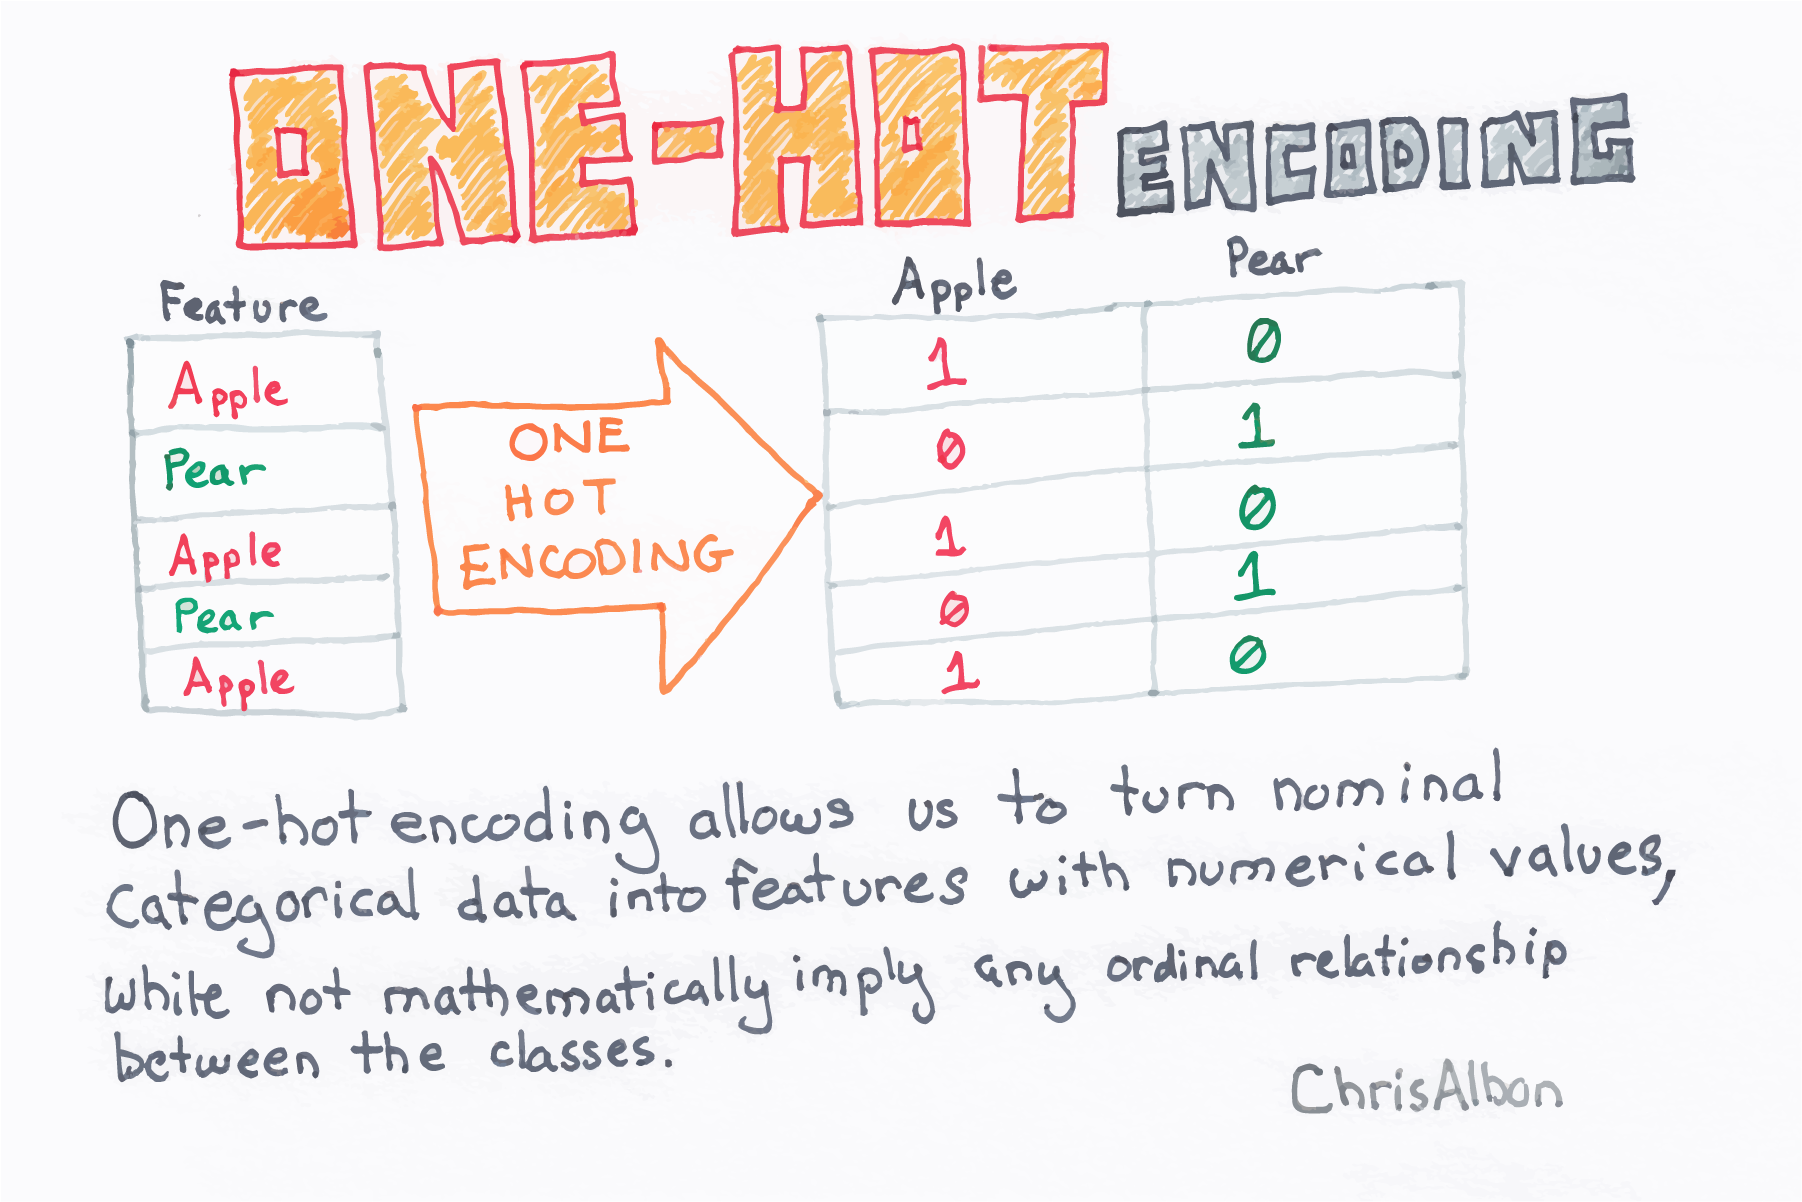

[Image Source](https://chrisalbon.com/machine_learning/preprocessing_structured_data/one-hot_encode_nominal_categorical_features/)


To update the `category_encoders` module, keep the internet ON (At right sidebar Settings > Internet [slider ON]). It will convert all the object data types into machine readable data (numerical).

In [ ]:
!pip install --upgrade category_encoders


In [ ]:
import category_encoders as ce
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['Country', 'Sex', 'Category'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


In [ ]:
X_train.head()

In [ ]:
X_train.shape, X_test.shape


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=2)
dtc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = DecisionTreeClassifier()

# Choose some parameter combinations to try
parameters  = {'criterion':['gini','entropy'],'max_depth':[20,30,40,50,70,90,120,150],'max_leaf_nodes': [9,10,11,12], 'random_state': [42,73,94]}


# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf1 = grid_obj.best_estimator_
clf1

In [ ]:
print("Test Score:",clf1.score(X_test,y_test))

In [ ]:
print("Train Score:",clf1.score(X_train,y_train))

Decent Accuracy score! You may use Ensembel Methods like adaboost and XGboost to see the difference. I hope liked it. Thank You for rading. If there is any suggestions or inputs kindly let me know in the comments below. 